In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Directories:

In [2]:
#--------Movie Lens Data directories-----------
MLens = "../Data/ml-latest-small/movies.csv"
MLensLinks = "../Data/ml-latest-small/links.csv"
MLensRatings = "../Data/ml-latest-small/ratings.csv"
MLensTags = "../Data/ml-latest-small/tags.csv"
#--------imdb Data directories-----------------
IMDB = "../Data/iMDB/IMDb movies.csv"
IMDBName = "../Data/iMDB/IMDb names.csv"
IMDBRatings = "../Data/iMDB/IMDb ratings.csv"
IMDBPrincipals = "../Data/iMDB/IMDb title_principals.csv"

# EDA:

## MovieLens Data:

In [3]:
movieLensdf = pd.read_csv(MLens)
linksdf = pd.read_csv(MLensLinks)
mLensRatingsdf = pd.read_csv(MLensRatings)
mLensTagsdf = pd.read_csv(MLensTags)

In [4]:
movieLensdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movieLensdf.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [6]:
linksdf.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
linksdf = linksdf.drop("tmdbId",axis=1)

In [8]:
linksdf.dtypes

movieId    int64
imdbId     int64
dtype: object

In [9]:
mLensRatingsdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
mLensRatingsdf.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [11]:
mLensTagsdf.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
mLensTagsdf.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

## IMDb Data:

In [13]:
imdbdf = pd.read_csv(IMDB)
imdbNamesdf = pd.read_csv(IMDBName)
imdbRatingsdf = pd.read_csv(IMDBRatings)
imdbPrincipalsdf = pd.read_csv(IMDBPrincipals)

/Users/nourghribi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### IMDb movies:

In [14]:
imdbdf.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [15]:
imdbdf.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [16]:
imdbdf.count()

imdb_title_id            85855
title                    85855
original_title           85855
year                     85855
date_published           85855
genre                    85855
duration                 85855
country                  85791
language                 85022
director                 85768
writer                   84283
production_company       81400
actors                   85786
description              83740
avg_vote                 85855
votes                    85855
budget                   23710
usa_gross_income         15326
worlwide_gross_income    31016
metascore                13305
reviews_from_users       78258
reviews_from_critics     74058
dtype: int64

**Null values:**

In [17]:
imdbdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

**Depending on the visualization in question, we will need to decide what to do with the null values.**

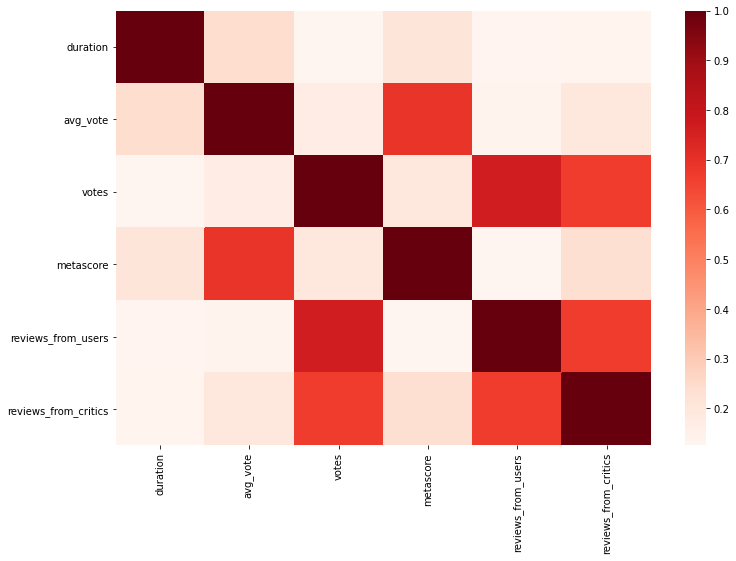

In [18]:
corr=imdbdf.corr()
fig, ax =plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.show()

### IMDb names:

In [19]:
imdbNamesdf.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [20]:
imdbNamesdf.dtypes

imdb_name_id              object
name                      object
birth_name                object
height                   float64
bio                       object
birth_details             object
date_of_birth             object
place_of_birth            object
death_details             object
date_of_death             object
place_of_death            object
reason_of_death           object
spouses_string            object
spouses                    int64
divorces                   int64
spouses_with_children      int64
children                   int64
dtype: object

**Null values:**

**Null values:**

In [21]:
imdbNamesdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_name_id                  0
name                          0
birth_name                    0
height                   253024
bio                       93007
birth_details            187093
date_of_birth            187093
place_of_birth           193713
death_details            257772
date_of_death            257772
place_of_death           260667
reason_of_death          275011
spouses_string           252353
spouses                       0
divorces                      0
spouses_with_children         0
children                      0
dtype: int64

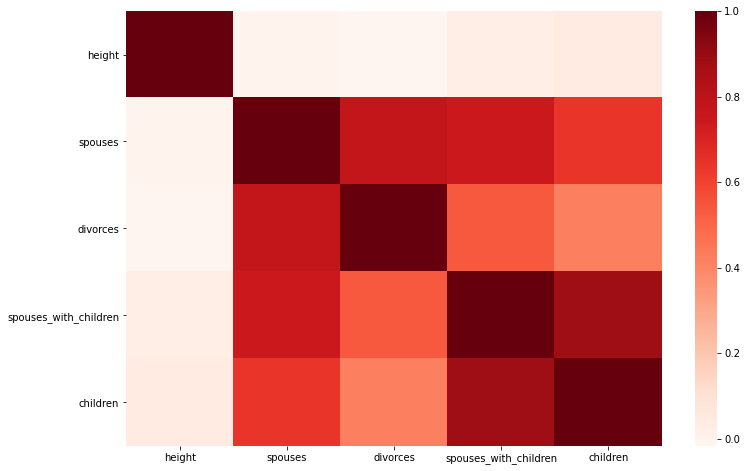

In [44]:
corr=imdbNamesdf.corr()
fig, ax =plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.savefig("../Figures/imdbNames.png")
plt.show()

### IMDb Ratings:

In [23]:
imdbRatingsdf.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [24]:
imdbRatingsdf.dtypes

imdb_title_id                 object
weighted_average_vote        float64
total_votes                    int64
mean_vote                    float64
median_vote                  float64
votes_10                       int64
votes_9                        int64
votes_8                        int64
votes_7                        int64
votes_6                        int64
votes_5                        int64
votes_4                        int64
votes_3                        int64
votes_2                        int64
votes_1                        int64
allgenders_0age_avg_vote     float64
allgenders_0age_votes        float64
allgenders_18age_avg_vote    float64
allgenders_18age_votes       float64
allgenders_30age_avg_vote    float64
allgenders_30age_votes       float64
allgenders_45age_avg_vote    float64
allgenders_45age_votes       float64
males_allages_avg_vote       float64
males_allages_votes          float64
males_0age_avg_vote          float64
males_0age_votes             float64
m

**Null values:**

In [25]:
imdbRatingsdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

In [26]:
votes_columns = np.array([ "votes_{}".format(i) for i in (range(1,11))])
imdbRatingsdf[votes_columns].head()

,votes_1,votes_2,votes_3,votes_4,votes_5,votes_6,votes_7,votes_8,votes_9,votes_10
0,14,5,1,9,28,28,43,10,4,12
1,16,13,20,28,103,139,137,58,18,57
2,4,6,5,16,32,52,44,17,6,6
3,16,25,26,63,117,98,62,16,8,15
4,87,20,39,66,169,344,641,436,225,210


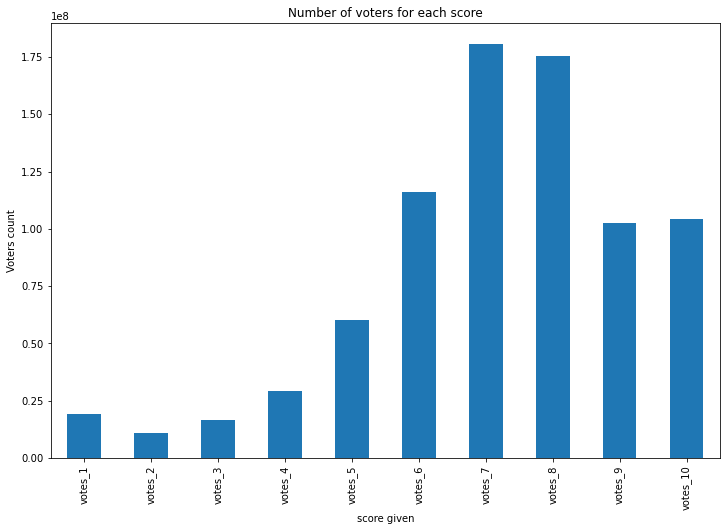

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
imdbRatingsdf[votes_columns].sum().plot.bar(ax)
ax.set_ylabel("Voters count")
ax.set_xlabel("score given")
ax.set_title("Number of voters for each score")
plt.savefig("../Figures/scoresDistribution.png")
plt.show()

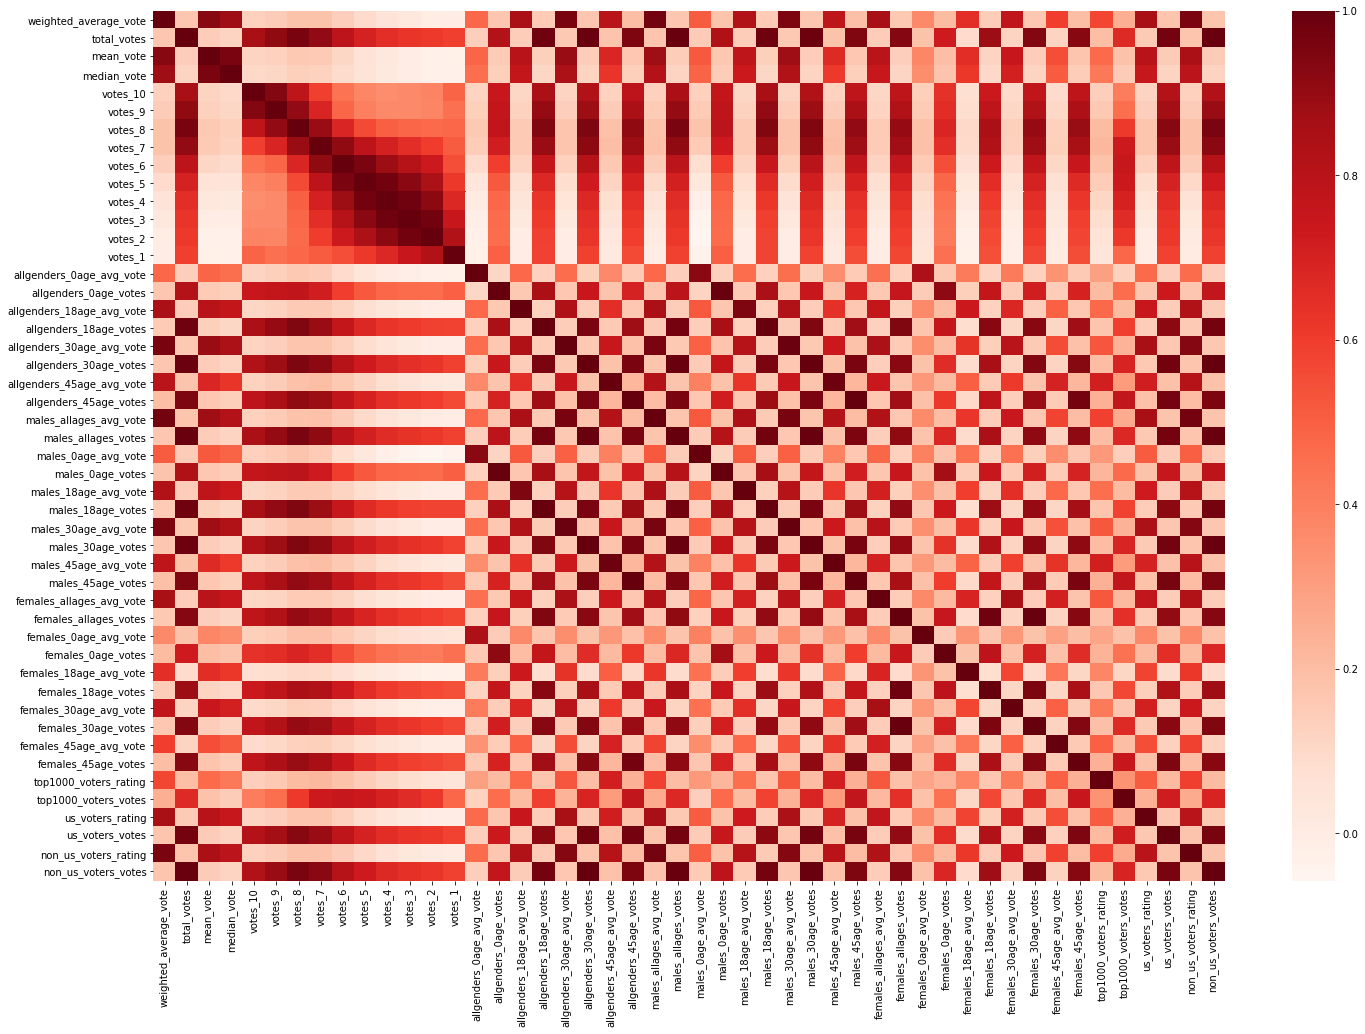

In [28]:
corr=imdbRatingsdf.corr()
fig, ax =plt.subplots(figsize=(24,16))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.show()

### IMDb Principals:

In [29]:
imdbPrincipalsdf.head(10)

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
5,tt0000574,2,nm0846894,actor,NaN,"[""School Master""]"
6,tt0000574,3,nm3002376,actor,NaN,"[""Steve Hart""]"
7,tt0000574,4,nm0170118,actress,NaN,NaN
8,tt0000574,5,nm0846879,director,NaN,NaN
9,tt0000574,6,nm0317210,producer,producer,NaN


In [30]:
imdbPrincipalsdf.dtypes

imdb_title_id    object
ordering          int64
imdb_name_id     object
category         object
job              object
characters       object
dtype: object

**Null values:**

In [31]:
imdbPrincipalsdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id         0
ordering              0
imdb_name_id          0
category              0
job              622782
characters       494677
dtype: int64

# Merging it together:

In [32]:
mLensRatingsdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
imdbRatingsdf.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [34]:
linksdf.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [35]:
linksdf['imdbId'] = linksdf["imdbId"].apply(lambda x: "tt{:07d}".format(x))
linksdf.head()

,movieId,imdbId
0,1,tt0114709
1,2,tt0113497
2,3,tt0113228
3,4,tt0114885
4,5,tt0113041


In [37]:
mergedmovies = linksdf.merge(imdbRatingsdf, left_on="imdbId", right_on="imdb_title_id")

In [40]:
mergedmovies

,movieId,imdbId,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,1,tt0114709,tt0114709,8.3,864461,8.3,8.0,177024,214560,273073,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
1,2,tt0113497,tt0113497,7.0,299083,7.1,7.0,24313,22327,63008,...,7.2,25960.0,7.2,4219.0,6.8,792.0,7.0,49740.0,6.9,134663.0
2,3,tt0113228,tt0113228,6.7,23742,6.8,7.0,2270,1389,3441,...,6.9,1778.0,6.9,880.0,6.2,373.0,6.7,8332.0,6.6,8209.0
3,4,tt0114885,tt0114885,5.9,9353,6.2,6.0,1205,442,989,...,6.5,1784.0,6.6,970.0,5.2,214.0,6.2,3824.0,5.3,2301.0
4,5,tt0113041,tt0113041,6.1,33587,6.2,6.0,2371,1370,3186,...,6.4,5191.0,6.3,1188.0,5.5,382.0,6.1,9446.0,5.9,13165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,193571,tt3110014,tt3110014,6.7,286,6.8,7.0,28,19,50,...,6.8,33.0,8.3,3.0,8.0,6.0,7.4,29.0,6.6,154.0
8558,193573,tt3837248,tt3837248,7.2,455,7.7,8.0,172,31,72,...,7.7,10.0,4.0,4.0,6.4,18.0,7.5,55.0,7.0,104.0
8559,193581,tt5476944,tt5476944,7.7,847,8.1,8.0,291,110,179,...,8.0,50.0,8.1,13.0,6.2,16.0,7.8,99.0,7.4,259.0
8560,193583,tt5914996,tt5914996,7.5,2504,7.9,8.0,699,375,553,...,7.1,33.0,5.8,13.0,5.5,28.0,7.1,232.0,7.4,757.0


In [39]:
mLensRatingsdf.merge(mergedmovies, left_on="movieId", right_on="movieId")

,userId,movieId,rating,timestamp,imdbId,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,1,1,4.0,964982703,tt0114709,tt0114709,8.3,864461,8.3,8.0,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
1,5,1,4.0,847434962,tt0114709,tt0114709,8.3,864461,8.3,8.0,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
2,7,1,4.5,1106635946,tt0114709,tt0114709,8.3,864461,8.3,8.0,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
3,15,1,2.5,1510577970,tt0114709,tt0114709,8.3,864461,8.3,8.0,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
4,17,1,4.5,1305696483,tt0114709,tt0114709,8.3,864461,8.3,8.0,...,8.2,59102.0,8.3,12842.0,8.1,839.0,8.6,147914.0,8.2,338585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97964,610,160341,2.5,1479545749,tt0118745,tt0118745,5.9,656,6.0,6.0,...,3.4,14.0,6.0,9.0,4.4,26.0,6.0,218.0,5.6,262.0
97965,610,160527,4.5,1479544998,tt0066806,tt0066806,7.4,771,7.5,8.0,...,7.2,7.0,6.7,12.0,5.6,48.0,7.4,230.0,7.3,361.0
97966,610,160836,3.0,1493844794,tt0798722,tt0798722,6.9,614,6.9,7.0,...,7.3,51.0,6.7,15.0,7.0,19.0,6.9,80.0,6.9,372.0
97967,610,163937,3.5,1493848789,tt1540011,tt1540011,5.0,40222,5.0,5.0,...,5.0,2423.0,4.6,478.0,4.5,324.0,5.1,6352.0,4.9,17018.0
